<b><font size=6 color='green'>ch14. N차원 배열 다루기</font>

# 4절. 복사와 뷰

## 4.1 할당시 복사 안 함 (스칼라 변수 제외)

In [1]:
# 스칼라 변수
a = 10
b = 'Hello'
c = 1.2

In [4]:
a1 = a 
print('수정전')
print('a=',a,'이고 a1=',a1)
a=90
print('수정후')
print('a=',a,'이고 a1=',a1)

수정전
a= 90 이고 a1= 90
수정후
a= 90 이고 a1= 90


In [5]:
#  배열일 경우 

a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [9]:
print(a.shape)
print(type(a))
print(a.ndim)

(12,)
<class 'numpy.ndarray'>
1


In [10]:
b = a
b is a ## b==a 이건 b와 a의 값이 같은지를 비교. b is a 는 두 변수가 같은 객체인지 비교

True

In [11]:
np.all(b==a) ## 모든 요소가 True 인지 반환 

True

## 4.2 얕은 복사: 뷰(view) 

In [18]:
a = a.reshape(3,4)

In [19]:
c = a.view()
c is a 

False

In [20]:
np.all(c==a) # c가 a의 요소들을 모두 복사함. 다만, a처럼 c는 메모리를 독자적으로 소유하지 않음. 

True

In [21]:
c

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [22]:
c[:,2] = 999
c

array([[  0,   1, 999,   3],
       [  4,   5, 999,   7],
       [  8,   9, 999,  11]])

In [23]:
a # c가 메모리를 독자적으로 사용하지 않으므로, c를 바꾸면 원본인 a의 내용도 바뀜

array([[  0,   1, 999,   3],
       [  4,   5, 999,   7],
       [  8,   9, 999,  11]])

In [24]:
# 슬라이싱이 될 떄 뷰가 반환됨 -> 슬라이싱을 통한 split은 얕은 복사

a = np.array([[2,1,9,50],
              [7,5,7,80],
              [17,6,7,90]])

x = a[:,:-1] 
print(a)
print(x)

[[ 2  1  9 50]
 [ 7  5  7 80]
 [17  6  7 90]]
[[ 2  1  9]
 [ 7  5  7]
 [17  6  7]]


In [25]:
x[:,0] = 99
a

array([[99,  1,  9, 50],
       [99,  5,  7, 80],
       [99,  6,  7, 90]])

## 4.3 깊은 복사 : copy()

In [27]:
a = np.arange(12).reshape(3,4)
d = a.copy()


In [28]:
a[:,0] = 99 
a

array([[99,  1,  2,  3],
       [99,  5,  6,  7],
       [99,  9, 10, 11]])

In [29]:
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [31]:
# 슬라이싱이 될 때 뷰가 반환 되므로 copy()를 통해 깊은 복사를 함 
a = np.array([[2,1,9,50],
              [7,5,7,80],
              [17,6,7,90]])

x = a[:,:-1].copy()
print(a,end='\n\n')
print(x) # 바뀌지 않음 

[[ 2  1  9 50]
 [ 7  5  7 80]
 [17  6  7 90]]

[[ 2  1  9]
 [ 7  5  7]
 [17  6  7]]


In [32]:
x[0] = [999,999,999]
print(x, end='\n\n')
print(a) # 바뀌지 않음 

[[999 999 999]
 [  7   5   7]
 [ 17   6   7]]

[[ 2  1  9 50]
 [ 7  5  7 80]
 [17  6  7 90]]


# 5절. 고급인덱싱 

## 5.1 인덱스 배열로 인덱싱

In [34]:
a = np.arange(12)*2
a

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22])

In [35]:
i = np.array([1,1,3,8,5])

In [36]:
a[i]

array([ 2,  2,  6, 16, 10])

In [37]:
j = np.array([[3,4],
              [9,7]])

In [38]:
a[j]

array([[ 6,  8],
       [18, 14]])

In [41]:
                    # r,g,b
palette = np.array([[0,0,0], # black
                    [255,0,0], #red
                    [0,255,0], # green
                    [0,0,255], # blue
                    [255,255,255]]) # white
palette

array([[  0,   0,   0],
       [255,   0,   0],
       [  0, 255,   0],
       [  0,   0, 255],
       [255, 255, 255]])

In [47]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])

image_data = palette[image_index]
image_data

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0, 

In [48]:
image_data.shape

(10, 10, 3)

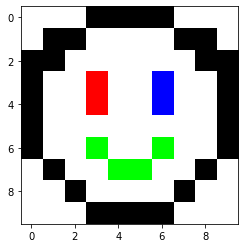

In [51]:
import matplotlib.pyplot as plt 

plt.imshow(image_data)
plt.show()

In [55]:
import tensorflow as tf

In [56]:
tf.__version__

'2.5.0'

In [59]:
from tensorflow.keras.datasets import mnist

mnist = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [62]:
mnist[0][1].shape
mnist[0][1]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [64]:
mnist[1][0].shape # 독립변수 (테스트 데이터세트)

(10000, 28, 28)

In [66]:
mnist[1][1] # 종속 변수 (테스트셋)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

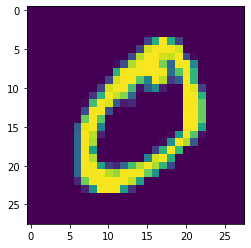

In [73]:
X = mnist[0][0]
y = mnist[0][1]

import matplotlib.pyplot as plt 

plt.imshow(X[1])
plt.show()

In [72]:
y[1]

0

In [74]:
X[1].shape

(28, 28)

In [75]:
list(X[1].flat)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 51,
 159,
 253,
 159,
 50,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 48,
 238,
 252,
 252,
 252,
 237,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 54,
 227,
 253,
 252,
 239,
 233,
 252,
 57,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 60,
 224,
 252,
 253,
 252,
 202,
 84,
 252,
 253,
 122,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 163,
 2

## 5.2 다차원 인덱싱

In [76]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [77]:
i = np.array([[0,1],
              [1,2]])
j = np.array([[2,1],
              [3,3]])

a[i,j] ## 각각 (0,2), (1,1), (1,3), ... 순으로 인덱스 값을 뽑아서 뿌림

array([[ 2,  5],
       [ 7, 11]])

In [78]:
i = np.array([0,1])
j = np.array([2,3])
a[i,j]

array([2, 7])

## 5.3 argmax: 최댓값의 인덱스

In [79]:
[0.001,99.954,0.01,0.1e-19]

[0.001, 99.954, 0.01, 1e-20]

In [2]:
data = np.sin(np.arange(20).reshape(5,4))
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [3]:
idx = data.argmax(axis=0) ## 각 열별 최댓값의 인덱스 반환

In [4]:
idx

array([2, 0, 3, 1], dtype=int64)

In [85]:
# 0열에서 최댓값 

data[idx[0],0]

0.9893582466233818

In [86]:
# 1열에서 최댓값 

data[idx[1],1]

0.8414709848078965

In [88]:
data_col_max = data[idx, range(data.shape[1])]
data_col_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [90]:
for i, item in enumerate(data_col_max):
    print('%d열의 최댓값은: %.2f'%(i,item))

0열의 최댓값은: 0.99
1열의 최댓값은: 0.84
2열의 최댓값은: 0.99
3열의 최댓값은: 0.66


In [1]:
# 행별 최댓값을 출력하기 (argmax 함수이용)

idx = data.argmax(axis=1)

NameError: name 'data' is not defined

In [108]:
data_row_max = data[range(data.shape[0]),idx]

## 5.3 인덱싱을 이용한 값 변경

In [109]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [110]:
a[::2] = 9 
a

array([9, 1, 9, 3, 9])

## 5.4 논리 배열을 이용한 인덱싱

In [5]:
a = np.arange(20).reshape(2,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [6]:
b = a%2==0

In [7]:
b

array([[ True, False,  True, False,  True, False,  True, False,  True,
        False],
       [ True, False,  True, False,  True, False,  True, False,  True,
        False]])

In [8]:
a[b] ## True인 인덱스만 나옴 

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [9]:
a[a%3==0]

array([ 0,  3,  6,  9, 12, 15, 18])

# 6. 선형대수 

* 2차원 넘파이 배열을 행렬 
    * 행렬곱 : @ 또는 np.dot()
    * 역행렬 :  np.linalg.inv(x)
    * 전치행렬 : x.T, x.transpose()
    * 단위행렬: np.eye(n): n행n열 단위행렬 생성 
    * 연립방정식 해 풀기 : np.linalg(x,y) (x가 정방행렬일 경우에만 가능)

## 6.1 선형 연립 방정식 풀기 (회귀 도출) : 독립변수2개, 데이터 2개 

In [116]:
#

a = np.array([[1,2],[3,4]])
a

array([[1, 2],
       [3, 4]])

In [117]:
np.linalg.inv(a) # a의 역행렬

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [119]:
np.all(np.eye(2)==np.linalg.inv(a)@a) # np.eye(2) : 2x2 단위 행렬 생성

False

In [120]:
a.T

array([[1, 3],
       [2, 4]])

In [122]:
a = np.array([[2,2,2],[3,3,3]])
a

array([[2, 2, 2],
       [3, 3, 3]])

In [123]:
np.linalg.inv(a) ## 정방행렬이 아니라 역행렬을 구하는것이 불가함 

LinAlgError: Last 2 dimensions of the array must be square

In [ ]:
a.T @ a # 정방행렬을 만들고자 할 때 전지 행렬을 양변에 곱해줌

**독립변수2개, 데이터2개**

In [124]:
x = np.array([[1,2],[3,4]])
y = np.array([[5],[7]])

<b>
x @ W = y<br>
x의 역행렬을 양변에 곱해서 정방행렬을 만들어줌<br> 
W = x의 역행렬@ y<br>
<b/>

In [125]:
W = np.linalg.inv(x)@y
W

array([[-3.],
       [ 4.]])

In [126]:
# 독립변수 2,3일 경우 종속 변수는?

2 *W[0] + 3*W[1]

array([6.])

## 6.2 선형 연립방정식 (회귀식 도출)과 그래프 : 독립변수 1개

**정방행렬을 위해 데이터2개 생성**

In [137]:
x = [2,3]
y = [6.8,7.3]

In [138]:
# 2 1
# 3 1

X = np.column_stack((x, np.ones(len(x))))

In [139]:
Y = np.array(y).reshape(2,1)

**X @ W = Y**

**X의 역행렬 @ W = X의 역행렬 @ Y** 

**W = X의 역행렬 @ Y**

In [140]:
W = np.linalg.inv(X)@Y
W

array([[0.5],
       [5.8]])

In [141]:
f = X[:,0]*W[0] + X[:,1]*W[1]
f

array([6.8, 7.3])

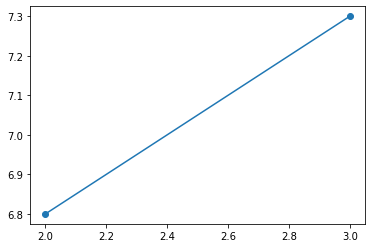

In [143]:
plt.scatter(x,y)
plt.plot(x,f,'-')
plt.show()

**데이터를 n개**

In [146]:
x = [32,67,96,118,126,144,152.5,158] # 독립변수 
y =  [18,24,61.5,49,52,105,130.3,125]

X = np.column_stack((x,np.ones(len(x))))
print(X,end='\n\n')
Y = np.array(y).reshape(len(y),1)
print(Y)

[[ 32.    1. ]
 [ 67.    1. ]
 [ 96.    1. ]
 [118.    1. ]
 [126.    1. ]
 [144.    1. ]
 [152.5   1. ]
 [158.    1. ]]

[[ 18. ]
 [ 24. ]
 [ 61.5]
 [ 49. ]
 [ 52. ]
 [105. ]
 [130.3]
 [125. ]]


In [149]:
# X.T @ X @ W = X.T@Y 

W = np.linalg.inv(X.T@X)@X.T@Y

In [158]:
f = X[:,0]*W[0]+W[1]

In [159]:
W

array([[  0.88235732],
       [-27.94828293]])

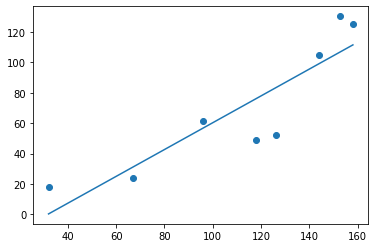

In [161]:
plt.scatter(x,y)
plt.plot(X[:,0],f,'-')
plt.show()

# 7절. 연습문제 

## 7.1 실습형

In [172]:
import numpy as np
from sklearn import datasets 
iris = datasets.load_iris() 
iris_data = iris.data

# iris_data 안에 독립, 종속 변수 배열이 각각 딕셔너리 형태로 담겨있음
print('독립변수:')
print(iris['data'][:5],end='\n\n') # 독립변수
print('종속변수:')
print(iris['target'][:100]) # 종속변수

X = iris['data']
y = iris['target']

독립변수:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

종속변수:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [174]:
## 1번. 
X.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [180]:
## 2번
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [177]:
## 3번
iris['data'][:5,:-1]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [182]:
## 4번
iris['data'][:5,-1]

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [184]:
## 5번. 
array3 = iris['data'][:5,:-1]
array4 = iris['data'][:5,-1]

np.hstack((array3,array4[:,np.newaxis]))

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [189]:
## 6번.
iris['data'][:5].mean(axis=0)
index = iris['data'][:5] > iris['data'][:5].mean(axis=0)

iris['data'][5][:]


TypeError: only integer scalar arrays can be converted to a scalar index

In [190]:
iris['data'][:5] >iris['data'][:5].mean(axis=0)

array([[ True,  True, False, False],
       [ True, False, False, False],
       [False, False, False, False],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [188]:
iris['data'][:5].mean(axis=0)

array([4.86, 3.28, 1.4 , 0.2 ])

### 7.2 문제 풀이형